In [2]:
import pandas as pd

sale=pd.read_csv('data/pizza_sale_cleaned.csv')
ing=pd.read_csv('data/pizza_ingredients_cleaned.csv')

In [3]:
sale['pizza_name_id'] = sale['pizza_name_id'].str.lower()
print(sale)

       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1  2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1  2015-01-01   11:57:40   
2             3         2  five_cheese_l         1  2015-01-01   11:57:40   
3             4         2    ital_supr_l         1  2015-01-01   11:57:40   
4             5         2     mexicana_m         1  2015-01-01   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615     48616     21348  ckn_alfredo_m         1  2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1  2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1  2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1  2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1  2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.

In [4]:
import numpy as np

sale['order_date'] = pd.to_datetime(sale['order_date'])
sale_agg = sale.groupby(['order_date', 'pizza_name_id','pizza_size','pizza_name','pizza_category','unit_price']).agg({'quantity': 'sum',}).reset_index()


# Calculate Z-scores for the 'quantity' column
sale_agg['z_score'] = (sale_agg['quantity'] - sale_agg['quantity'].mean()) / sale_agg['quantity'].std()

# Filter out outliers based on Z-score threshold of 3
threshold = 3
sale_filtered = sale_agg[np.abs(sale_agg['z_score']) <= threshold]
sale_outliers = sale_agg[np.abs(sale_agg['z_score']) > threshold]

# Drop the z_score column as it's no longer needed
sale_filtered = sale_filtered.drop(columns=['z_score'])
sale_outliers = sale_outliers.drop(columns=['z_score'])
sale_agg = sale_agg.drop(columns=['z_score'])

print(f"Original DataFrame shape: {sale_agg.shape}")
print(f"Outliers DataFrame shape: {sale_outliers.shape}")
print(f"Filtered DataFrame shape: {sale_filtered.shape}")

Original DataFrame shape: (22972, 7)
Outliers DataFrame shape: (359, 7)
Filtered DataFrame shape: (22613, 7)


In [5]:
print(sale_agg.describe())
print(sale_outliers.describe())
print(sale_filtered.describe())


                          order_date    unit_price      quantity
count                          22972  22972.000000  22972.000000
mean   2015-06-29 17:42:30.652968704     16.393949      2.158018
min              2015-01-01 00:00:00      9.750000      1.000000
25%              2015-03-31 00:00:00     12.750000      1.000000
50%              2015-06-29 00:00:00     16.500000      2.000000
75%              2015-09-28 00:00:00     20.250000      3.000000
max              2015-12-31 00:00:00     35.950000     15.000000
std                              NaN      3.634922      1.435879
                          order_date  unit_price    quantity
count                            359  359.000000  359.000000
mean   2015-06-28 22:35:45.961002752   16.370891    7.908078
min              2015-01-01 00:00:00    9.750000    7.000000
25%              2015-03-31 00:00:00   12.000000    7.000000
50%              2015-07-01 00:00:00   16.750000    7.000000
75%              2015-10-01 00:00:00   20.500000 

In [6]:
#feature engineering
# Extracting the day of the week
# sale_filtered['order_date']=pd.to_datetime(sale_filtered['order_date'])

# sale_filtered['day_of_week'] = sale_filtered['order_date'].dt.dayofweek # day_name()
# # Extracting the month
# sale_filtered['month'] = sale_filtered['order_date'].dt.month # month_name()
# # Createing a new column for the week number
# sale_filtered['week'] = sale_filtered['order_date'].dt.isocalendar().week
# # Extracting the year
# sale_filtered['year'] = sale_filtered['order_date'].dt.year
sale_filtered['order_date']=pd.to_datetime(sale_filtered['order_date'])
sale['order_date']=pd.to_datetime(sale['order_date'])
def extra_features_from_date(sale):
    sale['day_of_week'] = sale['order_date'].dt.weekday +1 #Starts with 1 as Monday to 7 as Sunday
    sale['day_of_year'] = sale['order_date'].dt.dayofyear 
    sale['day_of_month'] = sale['order_date'].dt.day
    sale['week_of_year'] = sale['order_date'].dt.strftime('%W') #week starts on Monday, new year days preceeding the first monday is week 0
    sale['month'] = sale['order_date'].dt.month    
    return sale



In [7]:

extra_features_from_date(sale_filtered)

,order_date,pizza_name_id,pizza_size,pizza_name,pizza_category,unit_price,quantity,day_of_week,day_of_year,day_of_month,week_of_year,month
0,2015-01-01,bbq_ckn_l,L,The Barbecue Chicken Pizza,Chicken,20.75,6,4,1,1,00,1
1,2015-01-01,bbq_ckn_m,M,The Barbecue Chicken Pizza,Chicken,16.75,4,4,1,1,00,1
2,2015-01-01,bbq_ckn_s,S,The Barbecue Chicken Pizza,Chicken,12.75,1,4,1,1,00,1
3,2015-01-01,big_meat_s,S,The Big Meat Pizza,Classic,12.00,5,4,1,1,00,1
4,2015-01-01,calabrese_m,M,The Calabrese Pizza,Supreme,16.25,1,4,1,1,00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22967,2015-12-31,the_greek_l,L,The Greek Pizza,Classic,20.50,1,4,365,31,52,12
22968,2015-12-31,the_greek_xl,XL,The Greek Pizza,Classic,25.50,1,4,365,31,52,12
22969,2015-12-31,veggie_veg_l,L,The Vegetables + Vegetables Pizza,Veggie,20.25,4,4,365,31,52,12
22970,2015-12-31,veggie_veg_m,M,The Vegetables + Vegetables Pizza,Veggie,16.00,2,4,365,31,52,12


In [8]:
import holidays
# using US holidays
us_holidays = holidays.US()

# Creating a 'holiday' column that indicates if the order_date was a holiday
sale_filtered['holiday'] = sale_filtered['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

# Checking if the holiday flag works
sale_filtered[['order_date', 'holiday']].head()

# Creating a 'promotional_period' flag for weekends 
sale_filtered['promotion'] = sale_filtered['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Checking if the promotion flag works
sale_filtered[['order_date', 'promotion']].head()
sale_filtered[sale_filtered['promotion'] == 1][['order_date', 'promotion']].head()

# Aggregateing sales data by date
daily_sales = sale_filtered.groupby('order_date')['quantity'].sum().reset_index()
# daily_sales.set_index('order_date', inplace=True)
daily_sales

print(sale_filtered)



      order_date pizza_name_id pizza_size                         pizza_name  \
0     2015-01-01     bbq_ckn_l          L         The Barbecue Chicken Pizza   
1     2015-01-01     bbq_ckn_m          M         The Barbecue Chicken Pizza   
2     2015-01-01     bbq_ckn_s          S         The Barbecue Chicken Pizza   
3     2015-01-01    big_meat_s          S                 The Big Meat Pizza   
4     2015-01-01   calabrese_m          M                The Calabrese Pizza   
...          ...           ...        ...                                ...   
22967 2015-12-31   the_greek_l          L                    The Greek Pizza   
22968 2015-12-31  the_greek_xl         XL                    The Greek Pizza   
22969 2015-12-31  veggie_veg_l          L  The Vegetables + Vegetables Pizza   
22970 2015-12-31  veggie_veg_m          M  The Vegetables + Vegetables Pizza   
22971 2015-12-31  veggie_veg_s          S  The Vegetables + Vegetables Pizza   

      pizza_category  unit_price  quant

In [9]:
print(daily_sales)

    order_date  quantity
0   2015-01-01       140
1   2015-01-02       149
2   2015-01-03       150
3   2015-01-04       106
4   2015-01-05       117
..         ...       ...
353 2015-12-27        89
354 2015-12-28       102
355 2015-12-29        80
356 2015-12-30        82
357 2015-12-31       171

[358 rows x 2 columns]


In [10]:
sale_filtered.drop(['order_date','pizza_name_id'],axis=1,inplace=True)
print(sale_filtered.dtypes)

pizza_size         object
pizza_name         object
pizza_category     object
unit_price        float64
quantity            int64
day_of_week         int32
day_of_year         int32
day_of_month        int32
week_of_year       object
month               int32
holiday             int64
promotion           int64
dtype: object


In [95]:
pip install tensorflow numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [12]:
sale_agg['order_date'] = pd.to_datetime(sale_agg['order_date'], format='%Y-%m-%d')

data = pd.pivot_table(
           data    = sale_agg,
           values  = 'quantity',
           index   = 'order_date',
           columns = 'pizza_name_id'
       )
data.columns.name = None
data.columns = [f"{col}" for col in data.columns]
data = data.asfreq('1D')
data = data.sort_index()
data.head(4)

,bbq_ckn_l,bbq_ckn_m,bbq_ckn_s,big_meat_s,brie_carre_s,calabrese_l,calabrese_m,calabrese_s,cali_ckn_l,cali_ckn_m,...,thai_ckn_m,thai_ckn_s,the_greek_l,the_greek_m,the_greek_s,the_greek_xl,the_greek_xxl,veggie_veg_l,veggie_veg_m,veggie_veg_s
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,6.0,4.0,1.0,5.0,NaN,NaN,1.0,NaN,2.0,1.0,...,2.0,1.0,NaN,NaN,3.0,1.0,1.0,1.0,NaN,2.0
2015-01-02,2.0,2.5,2.0,8.0,NaN,NaN,NaN,NaN,3.0,2.0,...,2.0,3.0,NaN,4.0,2.0,1.0,NaN,4.0,1.0,NaN
2015-01-03,3.0,3.0,1.0,8.0,1.0,NaN,1.0,NaN,5.0,4.0,...,3.0,1.5,NaN,2.0,1.0,4.0,NaN,2.0,4.0,1.0
2015-01-04,6.0,4.0,1.0,NaN,2.0,NaN,1.0,1.0,3.0,1.0,...,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN


In [13]:
data.fillna(0, inplace=True)
print(data)


            bbq_ckn_l  bbq_ckn_m  bbq_ckn_s  big_meat_s  brie_carre_s  \
order_date                                                              
2015-01-01        6.0        4.0        1.0         5.0           0.0   
2015-01-02        2.0        2.5        2.0         8.0           0.0   
2015-01-03        3.0        3.0        1.0         8.0           1.0   
2015-01-04        6.0        4.0        1.0         0.0           2.0   
2015-01-05        1.0        1.0        0.0         4.0           2.0   
...               ...        ...        ...         ...           ...   
2015-12-27        1.0        3.0        0.0         5.0           1.0   
2015-12-28        0.0        1.0        1.0         3.0           1.0   
2015-12-29        1.0        3.0        0.0         6.0           1.0   
2015-12-30        1.0        4.0        1.0         3.0           0.0   
2015-12-31        5.0        4.0        1.0         6.0           2.0   

            calabrese_l  calabrese_m  calabrese_s 

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
# H0: it is not stationary
# H1: it is stationary

def adf_test(sales):
  result = adfuller(sales)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print(f'# Lags used: {result[2]}')
  print(f'No of observations used: {result[3]}')
  if result[1] <= 0.05:
    print('we reject the null hypothesis, The series is stationary')
  else:
    print('Not enough statistical evidence to reject null hypothesis, The series is not stationary')

In [44]:
adf_test(quantity_over_time)

ADF Statistic: -5.220180
p-value: 0.000008
# Lags used: 15
No of observations used: 342
we reject the null hypothesis, The series is stationary


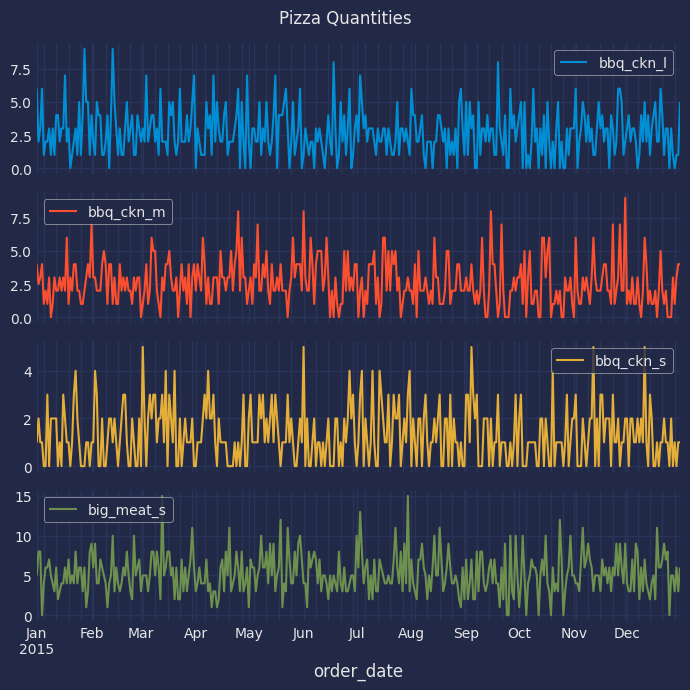

In [62]:
import skforecast
from skforecast.plot import set_dark_theme

# Plot time series for first 4 pizzas alone 
# ======================================================================================
set_dark_theme()
fig, axs = plt.subplots(4, 1, figsize=(7, 7), sharex=True)
data.iloc[:, :4].plot(
    legend   = True,
    subplots = True, 
    title    = 'Pizza Quantities',
    ax       = axs, 
)
fig.tight_layout()
plt.show()

In [63]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define sequence length
sequence_length = 7

# Split data into train and test sets
def train_test_split_sequences(data, sequence_length, test_size=0.2):
    n = len(data)
    split_idx = int(n * (1 - test_size))
    
    train_data = data[:split_idx]
    test_data = data[split_idx:]
    
    return train_data, test_data

# Function to create sequences
def create_sequences(data, sequence_length):
    generator = TimeseriesGenerator(data, data, length=sequence_length, batch_size=1)
    return generator

# Function to define and train LSTM model
def train_lstm_model(train_data, sequence_length):
    generator = create_sequences(train_data, sequence_length)
    
    model = Sequential([
        LSTM(32, activation='relu', input_shape=(sequence_length, train_data.shape[1])),
        Dense(train_data.shape[1])
    ])
    
    model.compile(optimizer='adam', loss='mse')
    model.fit(generator, epochs=20, verbose=1)
    
    return model


def predict_next_7_days(model, data, sequence_length, scaler):
    predictions = []
    recent_data = data[-sequence_length:]
    
    for _ in range(7):
        input_sequence = np.expand_dims(recent_data, axis=0)  # Shape: (1, sequence_length, number_of_features)
        pred_scaled = model.predict(input_sequence)
        pred = scaler.inverse_transform(pred_scaled.reshape(-1, pred_scaled.shape[-1]))  # Reshape for inverse_transform
        predictions.append(pred[-1])  # Append the last prediction
        
        # Update the recent data with the new prediction
        recent_data = np.append(recent_data[1:], np.expand_dims(pred_scaled[0], axis=0), axis=0)
    
    return np.array(predictions)
    
# Train-test split
train_data, test_data = train_test_split_sequences(scaled_data, sequence_length)

# Train the model
model = train_lstm_model(train_data, sequence_length)

Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0585
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0404
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0410
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0404
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0392
Epoch 6/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0396
Epoch 7/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0391
Epoch 8/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0394
Epoch 9/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0378
Epoch 10/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0378
Epoch 11/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0372
Epoch 12/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0367
Epoch 13/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0370
Epoch 14/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0363
Epoch 15/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [64]:
# Function to create sequences for test data
def create_sequences_for_test(data, sequence_length):
    generator = TimeseriesGenerator(data, data, length=sequence_length, batch_size=1, shuffle=False)
    return generator

# Create sequences for test data
test_generator = create_sequences_for_test(test_data, sequence_length)


In [65]:
# Get true values and predictions
def get_predictions_and_true_values(model, generator):
    true_values = []
    predictions = []
    
    for i in range(len(generator)):
        X, y = generator[i]
        y_pred = model.predict(X)
        
        true_values.append(y.flatten())
        predictions.append(y_pred.flatten())
    
    return np.array(true_values), np.array(predictions)

true_values, predictions = get_predictions_and_true_values(model, test_generator)

# Calculate MSE and MAE
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

In [66]:
# Inverse transform to original scale if needed
true_values_original = scaler.inverse_transform(true_values)
predictions_original = scaler.inverse_transform(predictions)

round_predictions = np.round(predictions_original).astype(int)

# Recalculate MSE and MAE in the original scale
mse_original = mean_squared_error(true_values_original, round_predictions)
mae_original = mean_absolute_error(true_values_original, round_predictions)

print(f'Original Scale Mean Squared Error (MSE): {mse_original}')
print(f'Original Scale Mean Absolute Error (MAE): {mae_original}')

Original Scale Mean Squared Error (MSE): 1.8644688644688647
Original Scale Mean Absolute Error (MAE): 0.9800199800199799


In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Hyper parameter tuning 

# Define sequence length
# Function to create sequences
def create_sequences(data, sequence_length):
    generator = TimeseriesGenerator(data, data, length=sequence_length, batch_size=1)
    return generator

# Function to create sequences for test data
def create_sequences_for_test(data, sequence_length):
    generator = TimeseriesGenerator(data, data, length=sequence_length, batch_size=1, shuffle=False)
    return generator


# Function to define and train LSTM model
def train_lstm_model1(train_data, sequence_length,unit):
    generator = create_sequences(train_data, sequence_length)
    
    model = Sequential([
        LSTM(unit, activation='relu', input_shape=(sequence_length, train_data.shape[1])),
        Dense(train_data.shape[1])
    ])
    
    model.compile(optimizer='adam', loss='mse')
    model.fit(generator, epochs=20, verbose=1)
    
    return model

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into train and test sets
def train_test_split_sequences(data, sequence_length, test_size=0.2):
    n = len(data)
    split_idx = int(n * (1 - test_size))
    
    train_data = data[:split_idx]
    test_data = data[split_idx:]
    
    return train_data, test_data

# Get true values and predictions
def get_predictions_and_true_values(model, generator):
    true_values = []
    predictions = []
    
    for i in range(len(generator)):
        X, y = generator[i]
        y_pred = model.predict(X)
        
        true_values.append(y.flatten())
        predictions.append(y_pred.flatten())
    
    return np.array(true_values), np.array(predictions)

sequence_length = [7,14,30]
units = [32,64,128,256 ]

for s in sequence_length:
    for i in units:

    
        train_data, test_data = train_test_split_sequences(scaled_data, s)
        
        # Train the modeloaded_mo
        model = train_lstm_model1(train_data, s,i)
        
        
        # Create sequences for test data
        test_generator = create_sequences_for_test(test_data, s)
        
        
        true_values, predictions = get_predictions_and_true_values(model, test_generator)
        
        # Calculate MSE and MAE
        mse = mean_squared_error(true_values, predictions)
        mae = mean_absolute_error(true_values, predictions)

        print(f'Sequence length : {s}')
        print(f'LSTM Unit size  : {i}')
        print(f'Mean Squared Error (MSE): {mse}')
        print(f'Mean Absolute Error (MAE): {mae}')
        
        
        # Inverse transform to original scale if needed
        true_values_original = scaler.inverse_transform(true_values)
        predictions_original = scaler.inverse_transform(predictions)
        
        round_predictions = np.round(predictions_original).astype(int)
        
        # Recalculate MSE and MAE in the original scale
        mse_original = mean_squared_error(true_values_original, round_predictions)
        mae_original = mean_absolute_error(true_values_original, round_predictions)
        
        print(f'Original Scale Mean Squared Error (MSE): {mse_original}')
        print(f'Original Scale Mean Absolute Error (MAE): {mae_original}')
        

Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0575
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0417
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0406
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0405
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0388
Epoch 6/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0387
Epoch 7/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0377
Epoch 8/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0381
Epoch 9/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0376
Epoch 10/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0370
Epoch 11/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0368
Epoch 12/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0365
Epoch 13/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0352
Epoch 14/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0355
Epoch 15/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [68]:
# save model 
model.save("lstm_pizza_model.keras")

In [14]:
from tensorflow.keras.models import load_model

data 
data.head()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define sequence length
sequence_length = 7

loaded_model = load_model("lstm_pizza_model.keras")

def predict_next_7_days(model, data, sequence_length, scaler):
    predictions = []
    recent_data = data[-sequence_length:]
    
    for _ in range(7):
        input_sequence = np.expand_dims(recent_data, axis=0)  # Shape: (1, sequence_length, number_of_features)
        pred_scaled = model.predict(input_sequence)
        pred = scaler.inverse_transform(pred_scaled.reshape(-1, pred_scaled.shape[-1]))  # Reshape for inverse_transform
        predictions.append(pred[-1])  # Append the last prediction
        
        # Update the recent data with the new prediction
        recent_data = np.append(recent_data[1:], np.expand_dims(pred_scaled[0], axis=0), axis=0)
    
    return np.array(predictions)

In [15]:
# Predict for the next 7 days
test_predictions = predict_next_7_days(loaded_model, scaled_data, sequence_length, scaler)

print("Predictions for the next 7 days:", test_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predictions for the next 7 days: [[ 1.9336942   3.8608437   3.4069247   6.6659565   2.5608208   0.8033695
   2.4596205   0.87210345  2.987386    3.461054    3.2327943   0.01998921
   0.9781869   0.17143288  0.670084    0.35718763  2.183226    1.1641326
   4.0008483   1.6011498   7.2984147   3.7634144   2.005291   -0.22440314
   0.87475044  3.3180537   1.7047946   2.0540447   3.1217256   2.8693957
   1.1186273   1.1217663   1.6288031   3.3143597   1.0082542   0.24033177
  -0.24453154  0.8870169   0.24836123 -0.04741089 -0.23169203  1.8804243
   1.9520783   1.2024003   0.5295377   1.8108876   0.8433454   0.6174716
  -0.34467638  2.3823056   4.210855    2.9238331   2.9274554   1.7833227
   0.78752965  1.1302758   0.7470833   1

In [16]:
rounded_predictions = np.round(test_predictions).astype(int)

In [17]:
rounded_predictions = np.round(test_predictions).astype(int)

In [18]:
pizza_names = data.columns
pizza_names

Index(['bbq_ckn_l', 'bbq_ckn_m', 'bbq_ckn_s', 'big_meat_s', 'brie_carre_s',
       'calabrese_l', 'calabrese_m', 'calabrese_s', 'cali_ckn_l', 'cali_ckn_m',
       'cali_ckn_s', 'ckn_alfredo_l', 'ckn_alfredo_m', 'ckn_alfredo_s',
       'ckn_pesto_l', 'ckn_pesto_m', 'ckn_pesto_s', 'classic_dlx_l',
       'classic_dlx_m', 'classic_dlx_s', 'five_cheese_l', 'four_cheese_l',
       'four_cheese_m', 'green_garden_l', 'green_garden_m', 'green_garden_s',
       'hawaiian_l', 'hawaiian_m', 'hawaiian_s', 'ital_cpcllo_l',
       'ital_cpcllo_m', 'ital_cpcllo_s', 'ital_supr_l', 'ital_supr_m',
       'ital_supr_s', 'ital_veggie_l', 'ital_veggie_m', 'ital_veggie_s',
       'mediterraneo_l', 'mediterraneo_m', 'mediterraneo_s', 'mexicana_l',
       'mexicana_m', 'mexicana_s', 'napolitana_l', 'napolitana_m',
       'napolitana_s', 'pep_msh_pep_l', 'pep_msh_pep_m', 'pep_msh_pep_s',
       'pepperoni_l', 'pepperoni_m', 'pepperoni_s', 'peppr_salami_l',
       'peppr_salami_m', 'peppr_salami_s', 'prsc_argla

In [19]:
df_forecasted = pd.DataFrame(rounded_predictions, columns=pizza_names)

In [20]:
df_forecasted

,bbq_ckn_l,bbq_ckn_m,bbq_ckn_s,big_meat_s,brie_carre_s,calabrese_l,calabrese_m,calabrese_s,cali_ckn_l,cali_ckn_m,...,thai_ckn_m,thai_ckn_s,the_greek_l,the_greek_m,the_greek_s,the_greek_xl,the_greek_xxl,veggie_veg_l,veggie_veg_m,veggie_veg_s
0,2,4,3,7,3,1,2,1,3,3,...,1,1,1,2,1,2,0,1,3,1
1,2,2,1,4,1,1,1,0,2,2,...,1,1,1,1,1,1,0,1,1,1
2,2,2,1,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
3,2,2,1,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
4,2,2,1,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
5,2,2,2,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
6,2,2,2,4,2,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1


In [21]:
max_date = data.index.max()
max_date

Timestamp('2015-12-31 00:00:00')

In [22]:
next_1_day = max_date + pd.Timedelta(days=1)
next_7_days = max_date + pd.Timedelta(days=7)


In [23]:
print(next_1_day)
print(next_7_days)

2016-01-01 00:00:00
2016-01-07 00:00:00


In [24]:
file_name = f"{next_1_day.strftime('%b%d')}_to_{next_7_days.strftime('%b%d')}_forecast.csv"


In [25]:
df_forecasted.to_csv(file_name, index=False)
print(f"File saved as: {file_name}")

File saved as: Jan01_to_Jan07_forecast.csv


In [26]:
df_forecast = pd.read_csv(file_name)
df_forecast

,bbq_ckn_l,bbq_ckn_m,bbq_ckn_s,big_meat_s,brie_carre_s,calabrese_l,calabrese_m,calabrese_s,cali_ckn_l,cali_ckn_m,...,thai_ckn_m,thai_ckn_s,the_greek_l,the_greek_m,the_greek_s,the_greek_xl,the_greek_xxl,veggie_veg_l,veggie_veg_m,veggie_veg_s
0,2,4,3,7,3,1,2,1,3,3,...,1,1,1,2,1,2,0,1,3,1
1,2,2,1,4,1,1,1,0,2,2,...,1,1,1,1,1,1,0,1,1,1
2,2,2,1,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
3,2,2,1,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
4,2,2,1,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
5,2,2,2,4,1,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1
6,2,2,2,4,2,1,1,0,2,2,...,1,1,0,1,1,1,0,1,1,1


In [27]:
# Let's also create order with pizzas in each day
#and then also quantity in grams of each ingredient 

ing.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [28]:
ing['pizza_size'] = ing['pizza_name_id'].str[-1].str.upper()
ing

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,L
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,L
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,L
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,L
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,L
...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,S
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,S
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,S
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,S


In [29]:
# Creating Order List for each day
for day, quantities in enumerate(rounded_predictions):
    order_list = []
    
    for i, quantity in enumerate(quantities):
        if quantity > 0:
            pizza_code = pizza_names[i]
            
            # Debug: Print pizza_code to check if it matches ing pizza_name_id
            #print(f"Pizza code: {pizza_code}")
            
            # Get pizza name and size from ing
            pizza_info = ing[ing['pizza_name_id'] == pizza_code]
            
            if pizza_info.empty:
                print(f"No match found for {pizza_code} in ing")
            else:
                pizza_name = pizza_info['pizza_name'].values[0]
                pizza_size = pizza_info['pizza_size'].values[0]
                
                # Add to order list
                order_list.append({
                    'Code': pizza_code,
                    'Pizza Name': pizza_name,
                    'Size': pizza_size,
                    'Quantity': quantity
                })
    
    # Convert the list of orders to a DataFrame for this day
    df_order = pd.DataFrame(order_list)
    
    # Display the order for the day as a table
    print(f"\nPizza Quantity Forecast for Day {day + 1}:\n")
    print(df_order.to_string(index=False))



Pizza Quantity Forecast for Day 1:

          Code                                 Pizza Name Size  Quantity
     bbq_ckn_l                 The Barbecue Chicken Pizza    L         2
     bbq_ckn_m                 The Barbecue Chicken Pizza    M         4
     bbq_ckn_s                 The Barbecue Chicken Pizza    S         3
    big_meat_s                         The Big Meat Pizza    S         7
  brie_carre_s                       The Brie Carre Pizza    S         3
   calabrese_l                        The Calabrese Pizza    L         1
   calabrese_m                        The Calabrese Pizza    M         2
   calabrese_s                        The Calabrese Pizza    S         1
    cali_ckn_l               The California Chicken Pizza    L         3
    cali_ckn_m               The California Chicken Pizza    M         3
    cali_ckn_s               The California Chicken Pizza    S         3
 ckn_alfredo_m                  The Chicken Alfredo Pizza    M         1
   ckn_pesto_l

In [32]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Saving to excel for easy viewing 

file_name_pizza_order = f"pizza_order_forecast_{next_1_day.strftime('%b%d')}_to_{next_7_days.strftime('%b%d')}.xlsx"

# Create a Pandas Excel writer object
with pd.ExcelWriter(file_name_pizza_order, engine='openpyxl') as writer:
    # Loop through each day's pizza quantities
    for day, quantities in enumerate(rounded_predictions):
        order_list = []
        
        for i, quantity in enumerate(quantities):
            if quantity > 0:
                pizza_code = pizza_names[i]
                
                # Get pizza name and size from df_ing
                pizza_info = ing[ing['pizza_name_id'] == pizza_code]
                
                if not pizza_info.empty:
                    pizza_name = pizza_info['pizza_name'].values[0]
                    pizza_size = pizza_info['pizza_size'].values[0]
                    
                    # Add to order list
                    order_list.append({
                        'Code': pizza_code,
                        'Pizza Name': pizza_name,
                        'Size': pizza_size,
                        'Quantity': quantity
                    })
        
        # Convert the list of orders to a DataFrame for this day
        df_order = pd.DataFrame(order_list)
        
        # Write the DataFrame to a sheet in the Excel file
        df_order.to_excel(writer, sheet_name=f'Day_{day+1}', index=False)

print(f"File saved as: {file_name_pizza_order}")

File saved as: pizza_order_forecast_Jan01_to_Jan07.xlsx


In [34]:
# Calculating quantity amount in grams of each ingredient per day
# Determine the number of rows in the DataFrame
num_rows = len(df_forecast)

# Add a day column with values from 1 to num_rows
df_forecast['day'] = [(i % num_rows) + 1 for i in range(num_rows)]

df_forecast

,bbq_ckn_l,bbq_ckn_m,bbq_ckn_s,big_meat_s,brie_carre_s,calabrese_l,calabrese_m,calabrese_s,cali_ckn_l,cali_ckn_m,...,thai_ckn_s,the_greek_l,the_greek_m,the_greek_s,the_greek_xl,the_greek_xxl,veggie_veg_l,veggie_veg_m,veggie_veg_s,day
0,2,4,3,7,3,1,2,1,3,3,...,1,1,2,1,2,0,1,3,1,1
1,2,2,1,4,1,1,1,0,2,2,...,1,1,1,1,1,0,1,1,1,2
2,2,2,1,4,1,1,1,0,2,2,...,1,0,1,1,1,0,1,1,1,3
3,2,2,1,4,1,1,1,0,2,2,...,1,0,1,1,1,0,1,1,1,4
4,2,2,1,4,1,1,1,0,2,2,...,1,0,1,1,1,0,1,1,1,5
5,2,2,2,4,1,1,1,0,2,2,...,1,0,1,1,1,0,1,1,1,6
6,2,2,2,4,2,1,1,0,2,2,...,1,0,1,1,1,0,1,1,1,7


In [35]:
# Reshape df_forecast to long format
df_forecast_long = df_forecast.melt(id_vars=['day'], var_name='pizza_name_id', value_name='forecast_qty')
df_forecast_long

,day,pizza_name_id,forecast_qty
0,1,bbq_ckn_l,2
1,2,bbq_ckn_l,2
2,3,bbq_ckn_l,2
3,4,bbq_ckn_l,2
4,5,bbq_ckn_l,2
...,...,...,...
632,3,veggie_veg_s,1
633,4,veggie_veg_s,1
634,5,veggie_veg_s,1
635,6,veggie_veg_s,1


In [37]:
# Merge forecast data with ingredient quantities
df_merged = pd.merge(df_forecast_long, ing, on='pizza_name_id')
df_merged

,day,pizza_name_id,forecast_qty,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size
0,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,L
1,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Red Peppers,15.0,L
2,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Green Peppers,20.0,L
3,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Tomatoes,30.0,L
4,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Red Onions,60.0,L
...,...,...,...,...,...,...,...
3621,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Green Peppers,20.0,S
3622,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Red Onions,20.0,S
3623,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Zucchini,10.0,S
3624,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Spinach,15.0,S


In [38]:
# Calculate total quantity of each ingredient required per day
df_merged['total_qty'] = df_merged['forecast_qty'] * df_merged['Items_Qty_In_Grams']
df_merged

,day,pizza_name_id,forecast_qty,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size,total_qty
0,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,L,80.0
1,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Red Peppers,15.0,L,30.0
2,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Green Peppers,20.0,L,40.0
3,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Tomatoes,30.0,L,60.0
4,1,bbq_ckn_l,2,The Barbecue Chicken Pizza,Red Onions,60.0,L,120.0
...,...,...,...,...,...,...,...,...
3621,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Green Peppers,20.0,S,20.0
3622,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Red Onions,20.0,S,20.0
3623,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Zucchini,10.0,S,10.0
3624,7,veggie_veg_s,1,The Vegetables + Vegetables Pizza,Spinach,15.0,S,15.0


In [39]:
# Aggregate total quantities by day and pizza ingredient
df_total_qty_by_day_ingredient = df_merged.groupby(['day', 'pizza_ingredients'])['total_qty'].sum().reset_index()

# Print results in the desired format
for day in df_total_qty_by_day_ingredient['day'].unique():
    print(f"Day {day}")
    df_day = df_total_qty_by_day_ingredient[df_total_qty_by_day_ingredient['day'] == day]
    print(df_day[['pizza_ingredients', 'total_qty']].to_string(index=False))
    print()  # Newline for better readability

Day 1
         pizza_ingredients  total_qty
              ?duja Salami      160.0
             Alfredo Sauce       15.0
                 Anchovies      115.0
                Artichokes      360.0
                   Arugula       45.0
             Asiago Cheese      150.0
                     Bacon     1670.0
            Barbecue Sauce       85.0
         Barbecued Chicken      260.0
          Beef Chuck Roast      590.0
               Blue Cheese      210.0
         Brie Carre Cheese       90.0
          Calabrese Salami      650.0
                 Capocollo     2750.0
        Caramelized Onions       48.0
                   Chicken     2900.0
            Chipotle Sauce      260.0
           Chorizo Sausage      350.0
                  Cilantro      130.0
    Coarse Sicilian Salami      480.0
                      Corn      870.0
                  Eggplant       20.0
               Feta Cheese      400.0
            Fontina Cheese      290.0
       Friggitello Peppers       40.0
      

In [40]:
#Create excel file for easy viewing 

file_name_pizza_quantities = f"pizza_quantities_{next_1_day.strftime('%b%d')}_to_{next_7_days.strftime('%b%d')}.xlsx"

with pd.ExcelWriter(file_name_pizza_quantities, engine='openpyxl') as writer:
    # Iterate through each unique day
    for day in df_total_qty_by_day_ingredient['day'].unique():
        # Filter data for the current day
        df_day = df_total_qty_by_day_ingredient[df_total_qty_by_day_ingredient['day'] == day]
        
        # Write the DataFrame to a new sheet in the Excel file
        df_day[['pizza_ingredients', 'total_qty']].to_excel(writer, sheet_name=f'Day_{day}', index=False)

print(f"File saved as: {file_name_pizza_quantities}")

File saved as: pizza_quantities_Jan01_to_Jan07.xlsx
